# Sampling quantum states
Sampling single mode quantum states for use in quantum phase space simulations using the truncated Wigner and +P distributions. Similar methods can be applied to multimode simulations of Bose-Einstein condensates.

We use the methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033)

with erratum [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

A complete erratum can be found at [SciPost](https://scipost.org/commentaries/10.1016/j.optcom.2009.06.033/).

We add sampling for the additional distributions:
- fock state for +W
- thermal state for +P


For more information on Bose-Einstein condensate applications, see the review 

___Dynamics and statistical mechanics of ultra-cold Bose gases using c-field techniques___, P. B. Blakie, A. S. Bradley, M. J. Davis, R. J. Ballagh, and C. W. Gardiner, [Advances in Phyiscs 57, 363 (2008)](http://dx.doi.org/10.1080/00018730802564254)



In [14]:
using PhaseSpaceTools, Plots, LaTeXStrings
gr(size=(250,250),xlabel=L"\alpha_r",ylabel=L"\alpha_i",
    xlims=(-20,20),ylims=(-20,20),ms=.2,
    legend=false,grid=false,aspect_ratio=1,colorbar=true)

Plots.GRBackend()

In [22]:
function showmeansW(a,ā)
    n̄ = mean(a.*ā)-.5
    Vn= mean(a.^2 .*ā.^2)-mean(a.*ā)-n̄.^2
    println(" ")
    println("N = $N samples.")
    println(" ")
    println("Averages")
    println("<â> = ", mean(a))
    println("<â⁺â> = ",n̄)
    println("V(n̂) = ",Vn)
    println("Relative number variance = ",sqrt(abs(Vn))/abs(n̄))
end

showmeansW (generic function with 1 method)

In [5]:
?wigner

search: wigner



```
a,ā = wigner(state <: State,N)
```

Generate `N` samples from wigner phase-space distribution for `state`.

Implemented states are

  * `Coherent(α)`
  * `Thermal(α,n̄)`
  * `Squeezed(α,ϵ)`
  * `Crescent(α,ϵ,q)`
  * `Fock(n)`
  * `Bogoliubov(u,v,n̄)`

Moments of the Wigner distribution generate quantum operator averages that are symmetrically ordered.


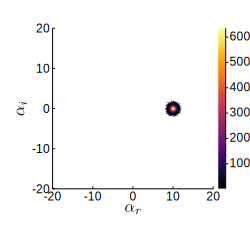

In [29]:
b = 10
N = 100000
state = Coherent(b)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [24]:
showmeansW(a,ā)

 
N = 10000 samples.
 
Averages
<â> = 10.007445969996486 - 0.007338376713532634im
<â⁺â> = 100.14621181703939 + 0.0im
V(n̂) = 100.28079272785544 + 0.0im
Relative number variance = 0.09999409476347319


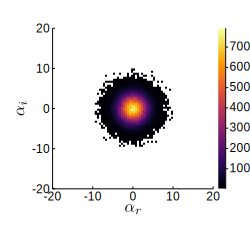

In [32]:
b = 10
N = 100000
state = Thermal(0,b)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [33]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = -0.005013406563815616 + 0.00903748972587871im
<â⁺â> = 10.02401704335578 + 0.0im
V(n̂) = 110.90486369756144 + 0.0im
Relative number variance = 1.0505905736547274


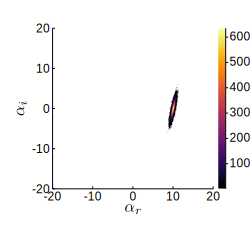

In [47]:
β = 10
ϕ = π/16
r = 1
ϵ = r*exp(2*im*ϕ)
N = 100000
state = Squeezed(β,ϵ)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [48]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = 9.9993547303912 - 0.002271797858323483im
<â⁺â> = 101.3576576177517 + 0.0im
V(n̂) = 47.41866112059506 + 0.0im
Relative number variance = 0.06793883231928803


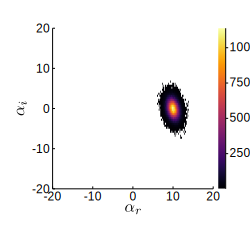

In [49]:
β = 10
ϕ = π/16
r = 1
ϵ = r*exp(2*im*ϕ)
N = 100000
state = Squeezed(β,ϵ)
a,ā = positiveP(state,N)
histogram2d(real(a),imag(a))

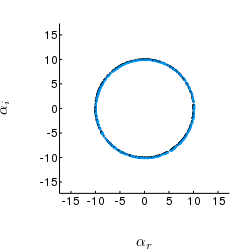

In [14]:
n = 100
N = 500
a,ā = fock(n,N;dist=:W)
scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [15]:
N=10000
a,ā = fock(n,N;dist=:W)
showmeans(n,N,a,ā)

 
n = 100 Fock state.
N = 10000 samples.
 
averages
<â> = 0.004904313230745544 + 0.018236569933407054im
<â⁺â> = 100.00715519993769 + 0.0im
V(n̂) = 0.0018690771048568422 + 0.0im
rel. num. var. = 0.00043229731217689734


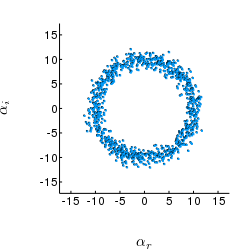

In [16]:
n = 100
N = 1000
a,ā = fock(n,N,dist=:posP)
 
scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [17]:
N = 10000;a,ā = fock(n,N,dist=:posP)
showmeans(n,N,a,ā)

 
n = 100 Fock state.
N = 10000 samples.
 
averages
<â> = 0.044631890920916566 + 0.08415470333160606im
<â⁺â> = 99.39310880805145 + 0.08306482231485703im
V(n̂) = -99.40017993098627 + 6.748464220171492im
rel. num. var. = 0.1004237554439083


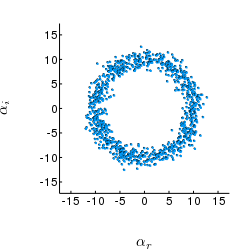

In [18]:
n = 100
N = 1000
a,ā = fock(n,N,dist=:posW)

scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [20]:
N = 100000;a,ā = fock(n,N,dist=:posP)
showmeans(n,N,a,ā)

 
n = 100 Fock state.
N = 100000 samples.
 
averages
<â> = 0.018940180251859385 - 0.005478746514583379im
<â⁺â> = 99.50929147050634 - 0.005970943256056217im
V(n̂) = -99.7996780811518 - 1.0333170262432183im
rel. num. var. = 0.10039511332729188


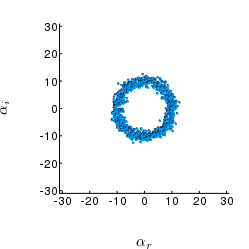

In [21]:
#for n>320 uses asymptotic expansion
n=321
N=1000
a,ā = fock(n,N,dist=:posW)
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [22]:
N = 100000;a,ā = fock(n,N,dist=:posP)
showmeans(n,N,a,ā)

 
n = 321 Fock state.
N = 100000 samples.
 
averages
<â> = -0.007086904258924521 + 0.054949035586832104im
<â⁺â> = 320.59430363517635 - 0.06999246822096071im
V(n̂) = -320.7927015795285 + 1.0234979237589954im
rel. num. var. = 0.05586728069803822


In [23]:
#push n and N
n=10000
N=100000
a,ā = fock(n,N,dist=:posW)
averages(n,N,a,ā)

UndefVarError: UndefVarError: averages not defined

In [24]:
?crescent

search: crescent CartesianIndices



```
a,ā = crescent(β,ϵ,q,N;dist=:posP)
```

Sample the phase-space distribution for a crescent state. First samples a squeezed state, then introduces a searing factor in phase-space in the form of a gaussian distributed random phase.

`β` is coherent (complex) amplitude.

`ϵ`: squeezing paramter.

`q`: shearing parameter.

`N`: number of samples.

`dist`: phase-space distribution. Can be `:posP`,`:Q` or `:W`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


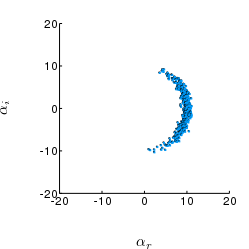

In [26]:
β = 10
ϵ = 0
q = .5
N = 500
a,ā = crescent(β,ϵ,q,N;dist=:W)
scatter(real(a),imag(a))

not quite the right moments for crescent state, but a sanity check of sorts:

In [27]:
mean(a.*ā)-.5, sinh(abs(ϵ)).^2+abs2(β)

(99.30804660811216 + 0.0im, 100.0)

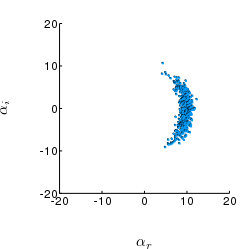

In [28]:
β = 10
ϵ = 0
q = .4
N = 500
a,ā = crescent(β,ϵ,q,N;dist=:Q)
scatter(real(a),imag(a))

In [29]:
mean(a.*ā)-1,sinh(abs(ϵ)).^2+abs2(β) 

(99.70203998822389 + 0.0im, 100.0)

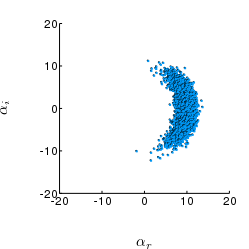

In [30]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist=:posP)
scatter(real(a),imag(a))

In [31]:
mean(a.*ā),sinh(abs(ϵ)).^2+abs2(β)

(99.9753991233408 + 0.2894912132621965im, 100.0)